#Pré-Processamento dos dados

In [1]:
# bibliotecas e módulos necessários
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

Os dados usados para análise foram adaptados, os dados originais podem ser acessados [aqui](https://www.kaggle.com/laotse/credit-risk-dataset). 

**Credit Risk Dataset**  
Trata-se de um *dataset* onde se quer avaliar quais clientes pagaram ou não um empréstimo realizado. A coluna *loan* mostra a quantia adquirida no empréstimo, a coluna *income* mostra a renda anual daquele cliente, *age* refere-se a idade do cliente e a coluna onde está a variável de interesse (ou classe) chama-se *default* onde temos apenas dois valores:  
  + 0 : O cliente pagou o empréstimo;
  + 1: O cliente não pagou o empréstimo

Os dados estão explicitados abaixo.

In [3]:
tabela = pd.read_csv('credit_data.csv');tabela

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [4]:
# verificando as primeiras informações sobre os dados
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [5]:
# Análise descritiva dos dados
tabela.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [6]:
# Verificando se existem valores nulos
tabela.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [7]:
# verificando se há alguma anomalia na classe
np.unique(tabela['default'],return_counts=1)

(array([0, 1]), array([1717,  283]))

Pode-se perceber que há algumas perturbações nos dados, são elas:  
+ A coluna *age* possui valores nulos;
+ A coluna *age* possui valores negativos; 
+ A coluna *age* possui valores do tipo *float64*;

In [8]:
media = tabela.loc[tabela['age']>0,'age'].mean();media

40.92770044906149

In [9]:
tabela[tabela['age'].isnull()]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [10]:
tabela.loc[tabela['age'].isnull(),'age'] = media

In [11]:
tabela['age'].isnull().sum()

0

In [12]:
tabela[tabela['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [13]:
tabela.loc[tabela['age']<0,'age'] = media; tabela.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [14]:
tabela.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927700,4444.369695,0.141500
std,577.494589,14326.327119,13.251870,3045.410024,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,500.750000,32796.459717,29.102161,1939.708847,0.000000
50%,1000.500000,45789.117313,41.300710,3974.719419,0.000000
75%,1500.250000,57791.281668,52.582340,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [15]:
tabela[tabela['age'] < 0].sum()

clientid    0.0
income      0.0
age         0.0
loan        0.0
default     0.0
dtype: float64

In [16]:
tabela['age'] = tabela['age'].round()
tabela.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.928500,4444.369695,0.141500
std,577.494589,14326.327119,13.262705,3045.410024,0.348624
min,1.000000,20014.489470,18.000000,1.377630,0.000000
25%,500.750000,32796.459717,29.000000,1939.708847,0.000000
50%,1000.500000,45789.117313,41.000000,3974.719419,0.000000
75%,1500.250000,57791.281668,53.000000,6432.410625,0.000000
max,2000.000000,69995.685578,64.000000,13766.051239,1.000000


Resolvido os problemas com a coluna *age*, passamos para a análise gráfica...

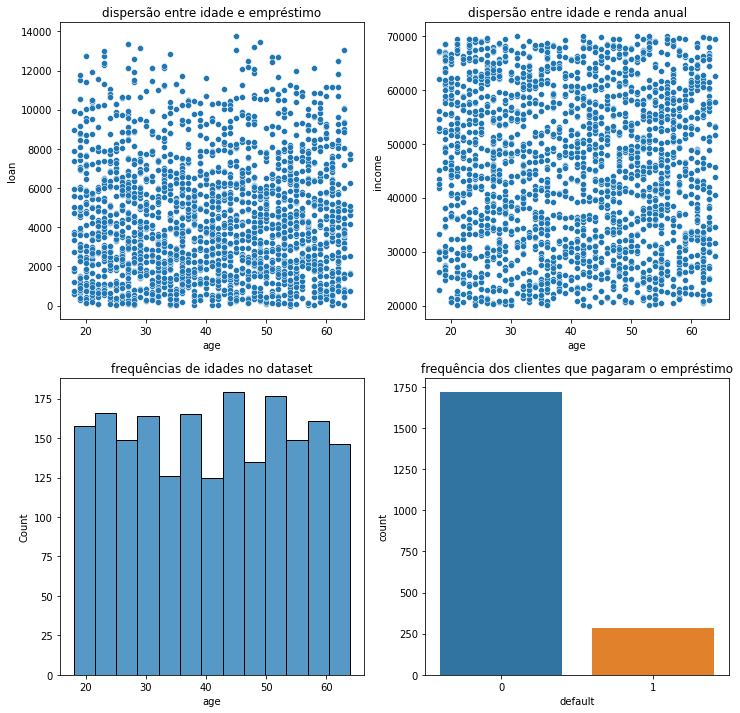

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.set_title('dispersão entre idade e empréstimo')
ax2.set_title('dispersão entre idade e renda anual')
ax3.set_title('frequências de idades no dataset')
ax4.set_title('frequência dos clientes que pagaram o empréstimo')
sns.scatterplot(x=tabela['age'],y=tabela['loan'],ax=ax1)
sns.scatterplot(x=tabela['age'],y=tabela['income'],ax=ax2)
sns.histplot(x=tabela['age'],ax=ax3)
sns.countplot(x=tabela['default'],ax=ax4);

In [ ]:
px.scatter_matrix(tabela,dimensions = ['income','age','loan'],color='default',title='Matrix de dispersão - Credit risk dataset')

# Algoritmos de Machine Learning

Dado o problema do *dataset* escolhido, serão utilizados algoritmos de classificação (*supervised learning*) para treinar os algoritmos e tentar prever se dado as informações históricas de um cliente, ele irá pagar ou não um empréstimo solicitado. 

Os algoritmos utilizados serão:
+ KNN;  
+ Decision Tree;
+ Random Forest;
+ SVM; 
+ Neural Network

dividindo o *dataset* em atributos e classe para o train_test_split

In [81]:
X = tabela.iloc[:,1:4].values
Y = tabela.iloc[:,4].values

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
x_train.shape,y_train.shape

((1400, 3), (1400,))

In [19]:
# importando os algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier

## Seleção dos hiperparâmetros (tuning)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
parametrosDT = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,5,10]
}

parametrosRF = {
    'n_estimators': [10,50,100,150],
    'criterion': ['gini','entropy'],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,5,10]
}

parametrosKNN = {
    'n_neighbors': [2,5,10],
    'p' : [1,2]
} 


parametrosSVM = {
    'tol': [0.0001,0.00001],
    'C': [1.0,1.5,2.0],
    'kernel': ['rbf','poly','linear','sigmoid']
}

parametrosNeN = {
    'activation': ['relu','tanh','logistic'],
    'solver': ['adam','sgd'],
    'batch_size': [10,56]
}

In [ ]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),param_grid = parametrosKNN)
grid_search.fit(X,Y)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
melhores_parametros,melhores_resultados

({'n_neighbors': 2, 'p': 1}, 0.852)

In [ ]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = parametrosDT)
grid_search.fit(X,Y)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
melhores_parametros,melhores_resultados

({'criterion': 'gini',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'},
 0.984)

In [ ]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),param_grid = parametrosRF)
grid_search.fit(X,Y)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
melhores_parametros,melhores_resultados

({'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.9875)

In [ ]:
grid_search = GridSearchCV(estimator = SVC(),param_grid = parametrosSVM)
grid_search.fit(X,Y)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
print(melhores_parametros,melhores_resultados)

{'C': 2.0, 'kernel': 'linear', 'tol': 0.0001} 0.9484999999999999


In [ ]:
grid_search = GridSearchCV(estimator = MLPClassifier(),param_grid = parametrosNeN)
grid_search.fit(X,Y)
melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_
melhores_parametros,melhores_resultados

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

({'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}, 0.9)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
resultadosKNN = []
resultadosDT = []
resultadosRF = []
resultadosSVM = []
resultadosNeN = []

for i in range(30):
  kfold = KFold(n_splits = 10,random_state = i, shuffle = True)
  KNN = KNeighborsClassifier(n_neighbors=2,p=1)
  scores = cross_val_score(KNN,X,Y,cv = kfold)
  resultadosKNN.append(scores.mean())
  DT = DecisionTreeClassifier(criterion = 'gini',
  min_samples_leaf = 1,
  min_samples_split = 5,
  splitter = 'best')
  scores = cross_val_score(DT,X,Y,cv = kfold)
  resultadosDT.append(scores.mean())
  RF = RandomForestClassifier(criterion = 'entropy',
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 150)
  scores = cross_val_score(RF,X,Y,cv = kfold)
  resultadosRF.append(scores.mean())
  SVM = SVC(C = 2.0, kernel = 'linear', tol = 0.0001)
  scores = cross_val_score(SVM,X,Y,cv = kfold)
  resultadosSVM.append(scores.mean())
  NeN = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
  scores = cross_val_score(NeN,X,Y,cv = kfold)
  resultadosNeN.append(scores.mean())




In [47]:
table = {
    'KNN': resultadosKNN,
    'DT': resultadosDT,
    'RF': resultadosRF,
    'SVM': resultadosSVM,
    'NeN': resultadosNeN
}
resultados = pd.DataFrame(table)
resultados

,KNN,DT,RF,SVM,NeN
0,0.8535,0.9770,0.9855,0.9455,0.9055
1,0.8555,0.9840,0.9860,0.9455,0.9125
2,0.8485,0.9840,0.9870,0.9460,0.9055
3,0.8500,0.9790,0.9865,0.9485,0.9095
4,0.8475,0.9825,0.9875,0.9455,0.8960
5,0.8510,0.9830,0.9870,0.9440,0.9065
6,0.8540,0.9830,0.9875,0.9470,0.8920
7,0.8535,0.9805,0.9865,0.9480,0.8915
8,0.8515,0.9800,0.9885,0.9430,0.8750
9,0.8510,0.9845,0.9850,0.9460,0.8785


In [34]:
resultados.describe()

,KNN,DT,RF,NeN
count,30.000000,30.000000,30.000000,30.000000
mean,0.851683,0.982417,0.986450,0.897817
std,0.002045,0.002174,0.001464,0.013769
min,0.847000,0.977000,0.983500,0.867000
25%,0.851000,0.981000,0.985500,0.888125
50%,0.851500,0.982750,0.986500,0.898500
75%,0.853500,0.984000,0.987375,0.908750
max,0.855500,0.985500,0.990000,0.917500


## Verificando a normalidade

In [38]:
from scipy.stats import shapiro 
shapiro(resultadosKNN),shapiro(resultadosDT),shapiro(resultadosRF),shapiro(resultadosSVM),shapiro(resultadosNeN)

((0.9599342942237854, 0.30857884883880615),
 (0.9547503590583801, 0.22618496417999268),
 (0.9829624891281128, 0.8976417779922485),
 (0.9859302043914795, 0.9519398212432861),
 (0.9518643021583557, 0.18961560726165771))

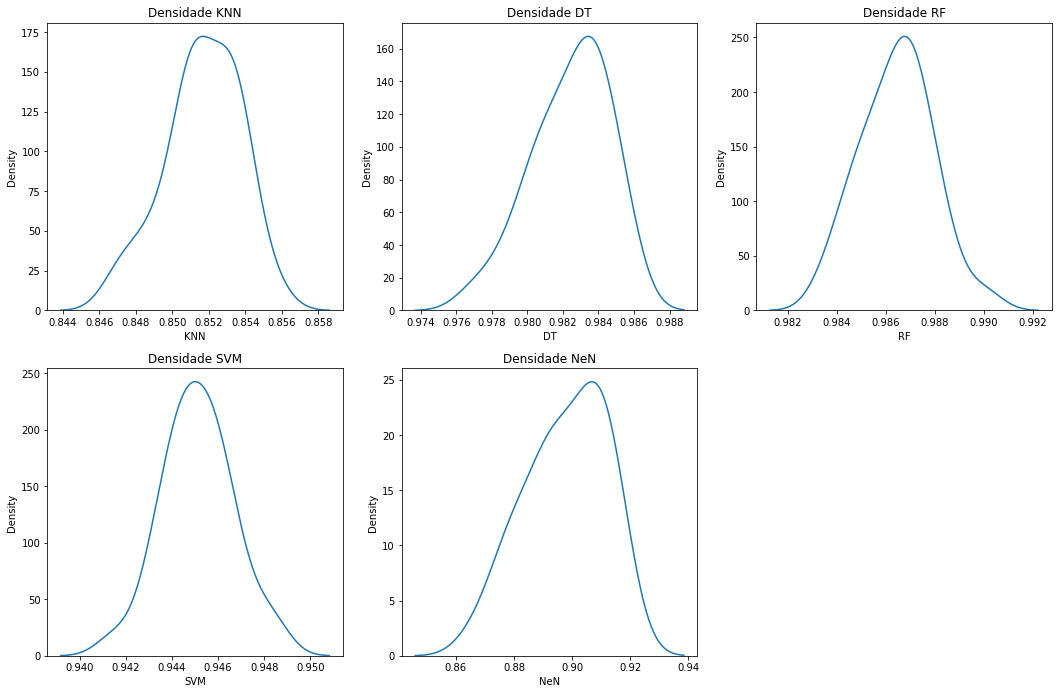

In [55]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax1.set_title('Densidade KNN')
ax2.set_title('Densidade DT')
ax3.set_title('Densidade RF')
ax4.set_title('Densidade SVM')
ax5.set_title('Densidade NeN')



sns.kdeplot(resultados.iloc[:,0],ax=ax1)
sns.kdeplot(resultados.iloc[:,1],ax=ax2)
sns.kdeplot(resultados.iloc[:,2],ax=ax3)
sns.kdeplot(resultados.iloc[:,3],ax=ax4)
sns.kdeplot(resultados.iloc[:,4],ax=ax5);

De acordo com o teste de Shapiro-Wilk, tem-se que

$$
\begin{cases}
H_0: \textrm{Os dados seguem normalidade.}\\
H_1: \textrm{Os dados não seguem normalidade.}
\end{cases}
$$

Portanto, com os valores de $p$ obtidos (todos maiores que 0.05), pode-se assumir normalidade dos dados com 95% de confiança para todos os algoritmos utilizados.  

## Teste de comparação múltipla (teste de Tukey)

In [56]:
from scipy.stats import f_oneway 
stats, p = f_oneway(resultadosDT,resultadosKNN,resultadosNeN,resultadosRF,resultadosSVM);p

4.477188125958473e-132

In [68]:
resultados_algoritmos = {
    'accuracy': np.concatenate([resultadosDT,resultadosRF,resultadosNeN,resultadosKNN,resultadosSVM]),
    'algoritmo': ['DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT','DT',
                  'RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF',
                  'NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN','NeN',
                  'KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN',
                  'SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM',]
}
df = pd.DataFrame(resultados_algoritmos)
df

,accuracy,algoritmo
0,0.9770,DT
1,0.9840,DT
2,0.9840,DT
3,0.9790,DT
4,0.9825,DT
...,...,...
145,0.9450,SVM
146,0.9445,SVM
147,0.9440,SVM
148,0.9445,SVM


In [75]:
from statsmodels.stats.multicomp import MultiComparison
alg = MultiComparison(df['accuracy'],df['algoritmo'])
print(alg.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    DT    KNN  -0.1307  0.001 -0.1353 -0.1262   True
    DT    NeN  -0.0846  0.001 -0.0891 -0.0801   True
    DT     RF    0.004 0.1078 -0.0005  0.0086  False
    DT    SVM  -0.0373  0.001 -0.0418 -0.0328   True
   KNN    NeN   0.0461  0.001  0.0416  0.0507   True
   KNN     RF   0.1348  0.001  0.1302  0.1393   True
   KNN    SVM   0.0934  0.001  0.0889   0.098   True
   NeN     RF   0.0886  0.001  0.0841  0.0932   True
   NeN    SVM   0.0473  0.001  0.0428  0.0518   True
    RF    SVM  -0.0413  0.001 -0.0459 -0.0368   True
----------------------------------------------------


então de acordo com o teste tukey, não rejeitamos $H_0$ apenas para as médias dos algoritmo *Decision Tree* e *Random Forest*, ou seja, as médias desses algoritmos não diferem significativamente a 95% de confiança.

In [76]:
resultados.mean()

KNN    0.851683
DT     0.982417
RF     0.986450
SVM    0.945117
NeN    0.897817
dtype: float64

Logo, o algoritmo que teve os melhores resultados foi o *Random Forest* com 98.6% de acurácia pelo método da validação cruzada.

# Aplicação dos melhores modelos

- *Random Forest*
- *Decision Tree*
- *SVM*

## *Decision Tree*

In [99]:
DT = DecisionTreeClassifier(criterion = 'gini',
  min_samples_leaf = 1,
  min_samples_split = 5,
  splitter= 'best',random_state = 0)
DT.fit(x_train,y_train)
previsoesDT = DT.predict(x_test);previsoesDT

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

0.975

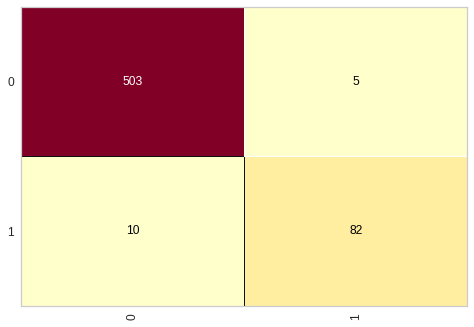

In [103]:
from yellowbrick.classifier import ConfusionMatrix
cf = ConfusionMatrix(DT)
cf.fit(x_train,y_train)
cf.score(x_test,y_test)

In [110]:
print(classification_report(y_test,previsoesDT))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       508
           1       0.94      0.89      0.92        92

    accuracy                           0.97       600
   macro avg       0.96      0.94      0.95       600
weighted avg       0.97      0.97      0.97       600



Portanto, o algoritmo *Decision Tree* consegue prever 99% (recall) de todas as pessoas que pagam o empréstimo e desses 99%, 98% (precision) realmente pagam o empréstimo. Já para os que não pagam, o algoritmo consegue prever 89% dos casos e desses 89%, 94% realmente não pagam o empréstimo.

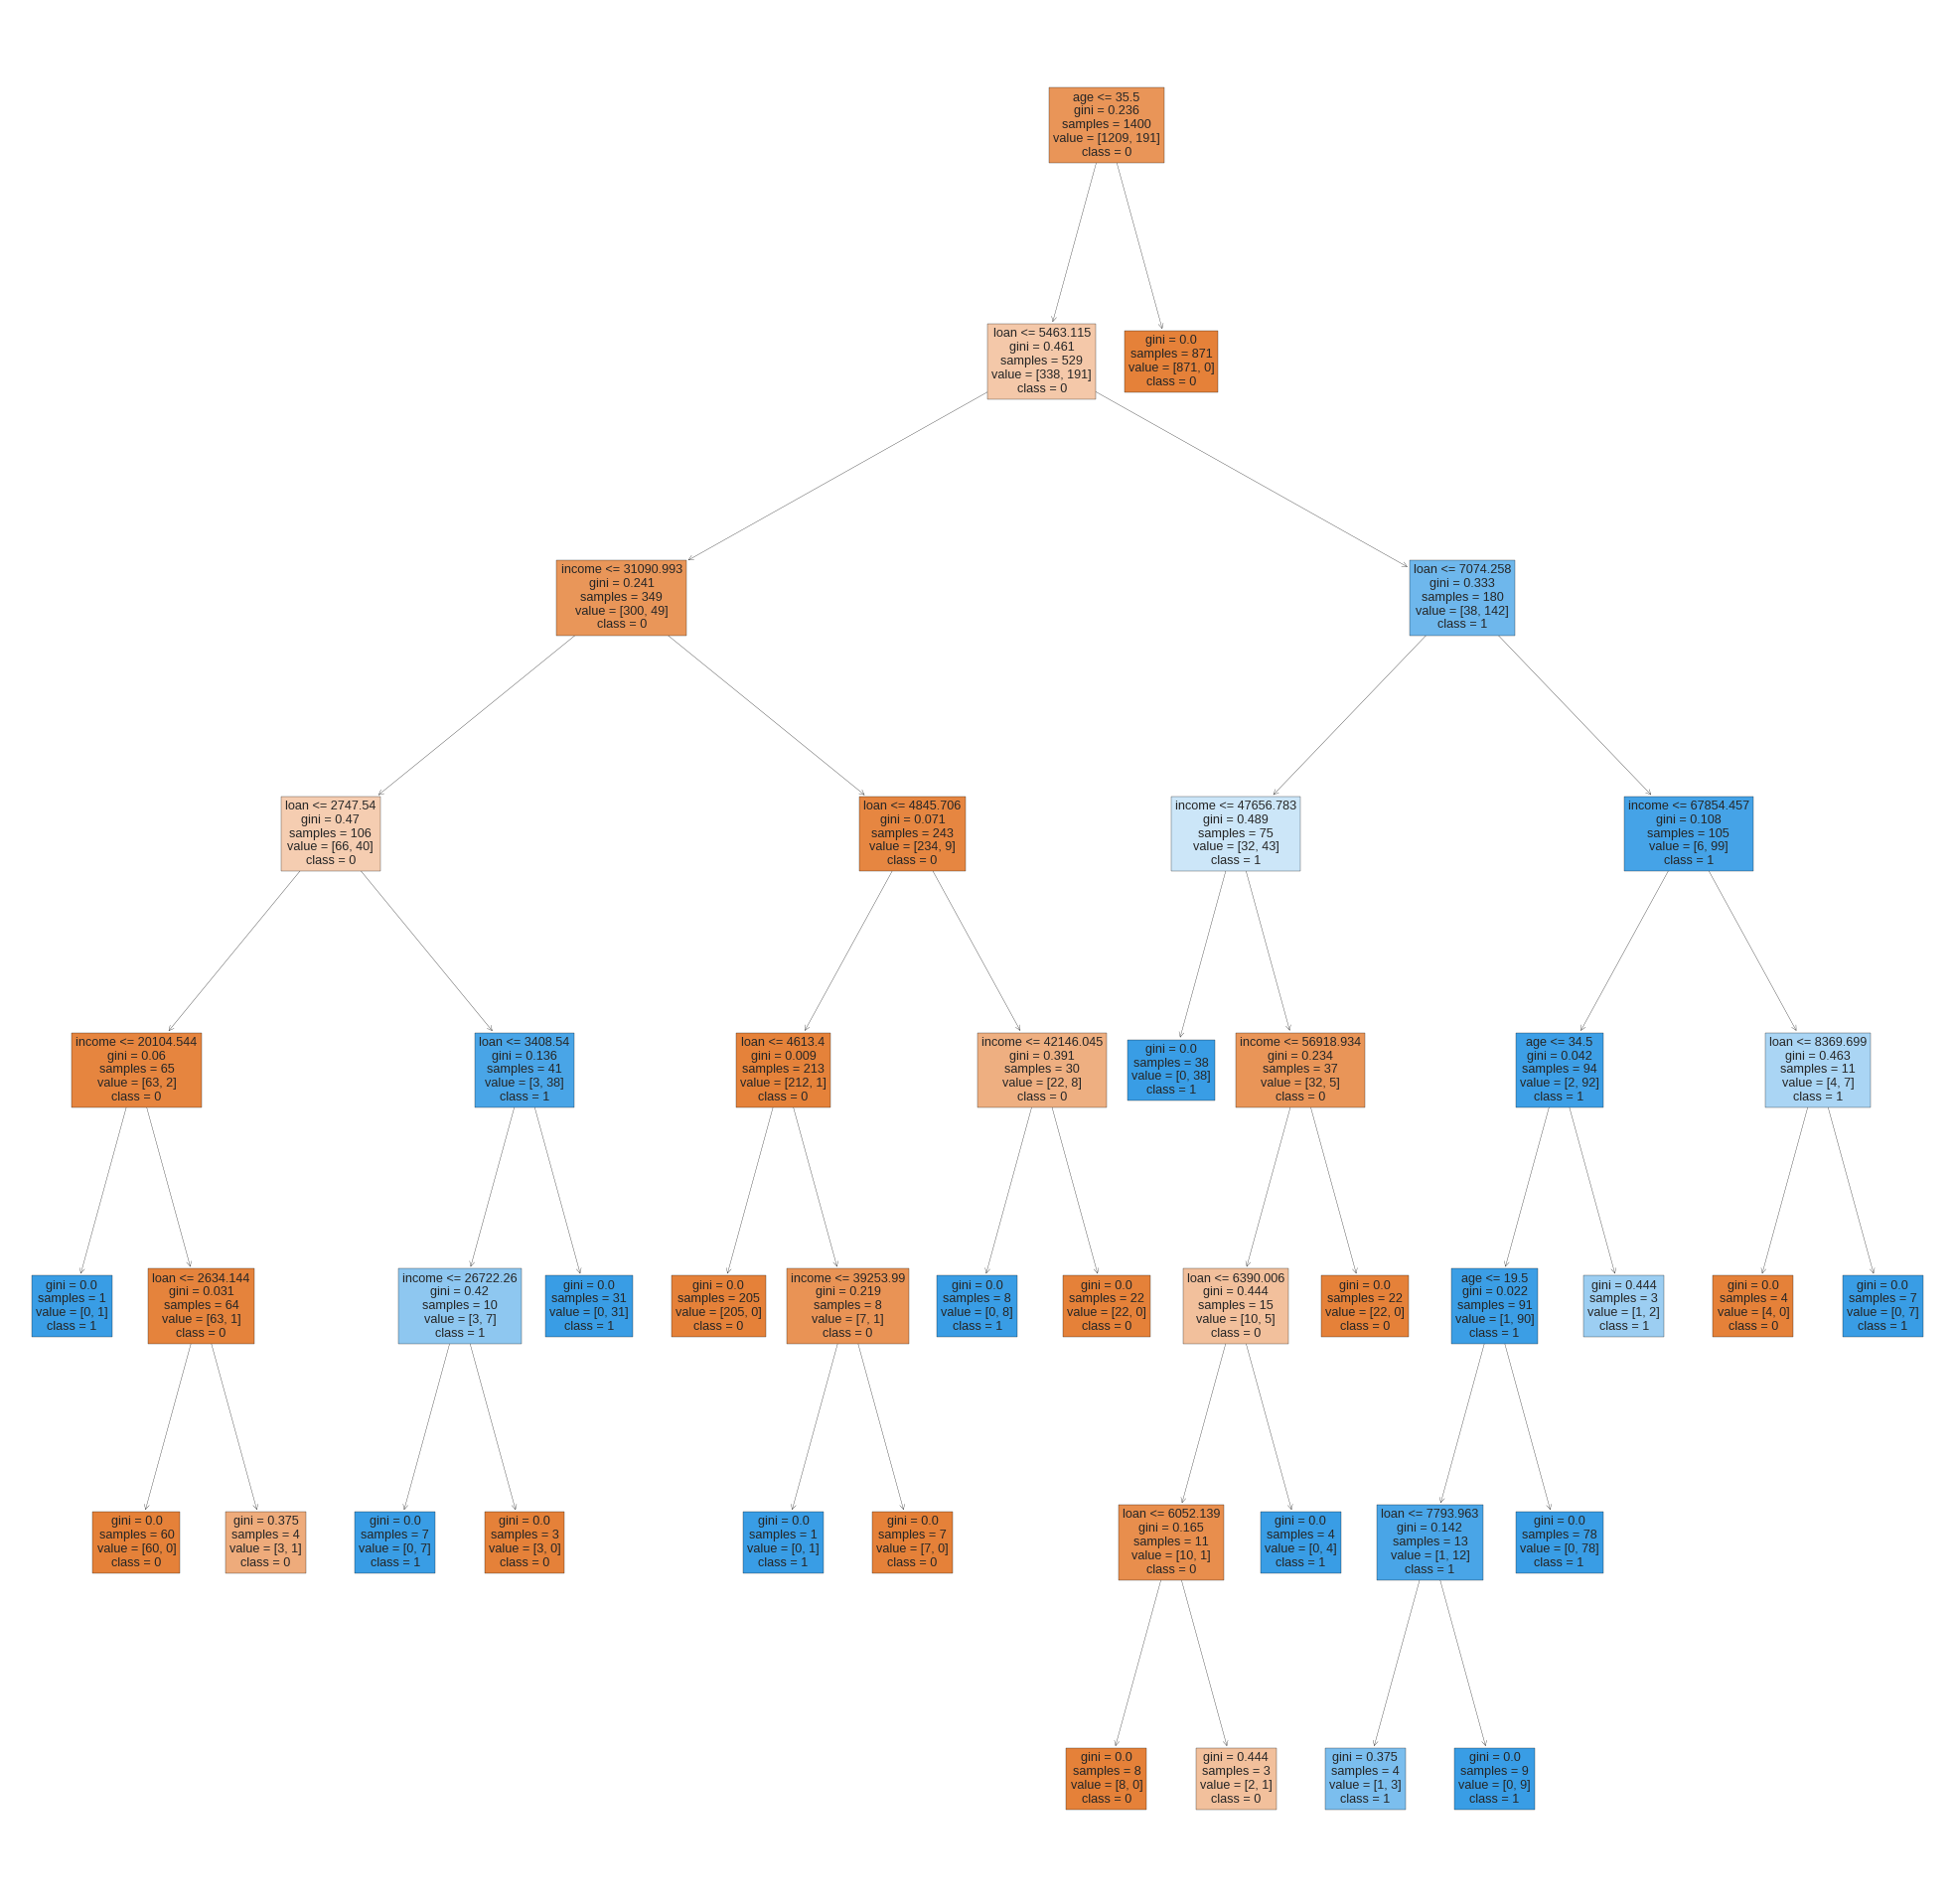

In [115]:
from sklearn import tree
features = ['income', 'age', 'loan']
fig, axes = plt.subplots(1,1,figsize = (35,35))
tree.plot_tree(DT, feature_names=features, class_names=['0','1'], filled=True);

## *Random Forest*

In [104]:
RF = RandomForestClassifier(criterion = 'entropy',
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 150,random_state=0)
RF.fit(x_train,y_train)
previsoesRF = RF.predict(x_test);previsoesRF

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

0.9883333333333333

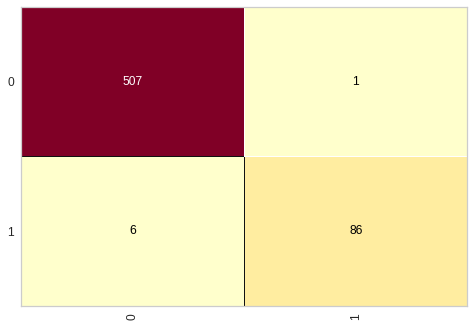

In [105]:
cf = ConfusionMatrix(RF)
cf.fit(x_train,y_train)
cf.score(x_test,y_test)

In [116]:
print(classification_report(y_test,previsoesRF))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       508
           1       0.99      0.93      0.96        92

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



Portanto, o algoritmo *Random Forest* consegue prever 100% (recall) de todas as pessoas que pagam o empréstimo e desses 100%, 99% (precision) realmente pagam o empréstimo. Já para os que não pagam, o algoritmo consegue prever 93% dos casos e desses 93%, 99% realmente não pagam o empréstimo.

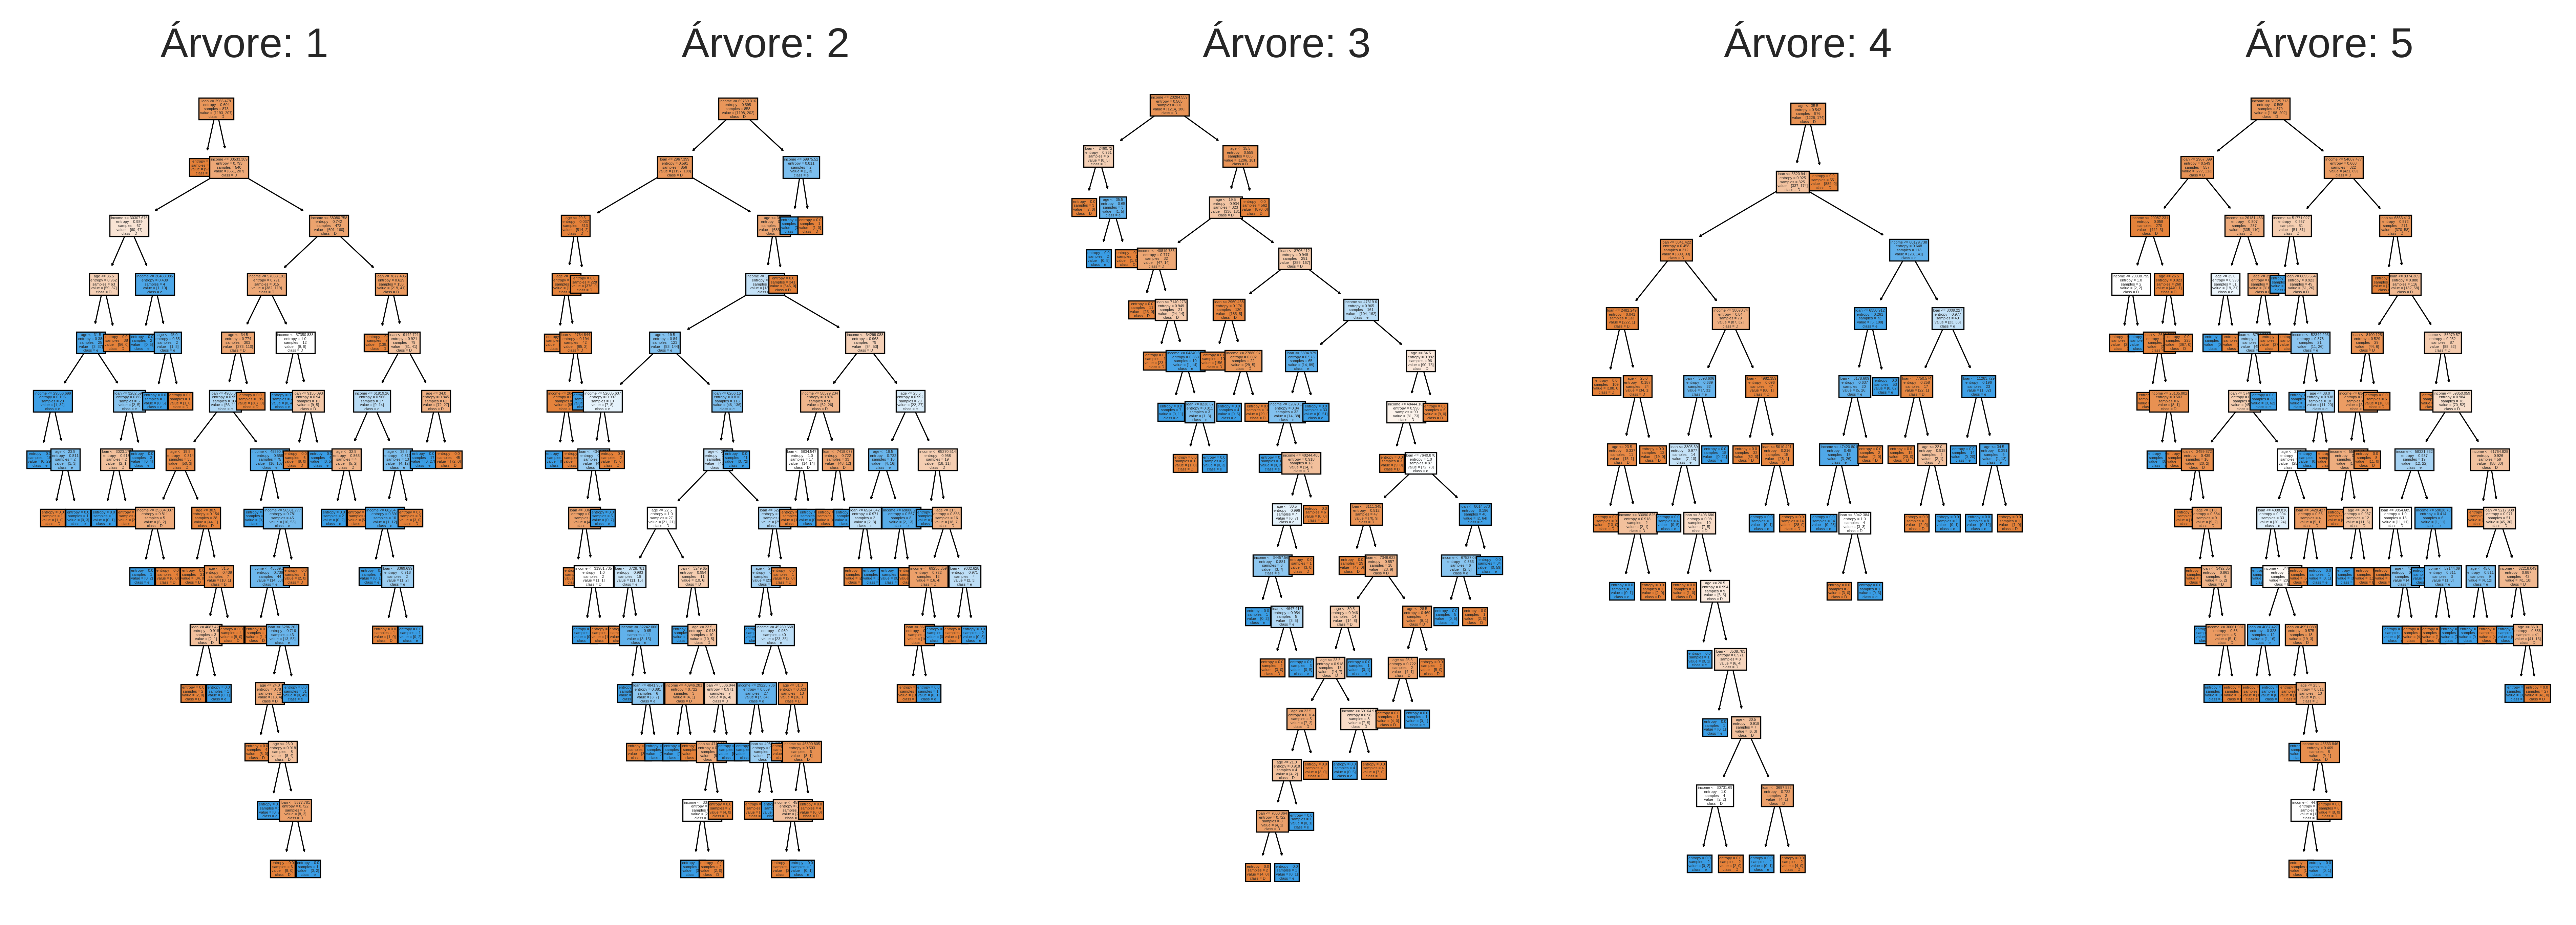

In [127]:
from sklearn import tree
features=['income', 'age', 'loan']
fig, axes = plt.subplots(1,5,figsize = (12,4),dpi=800)
for i in range(0, 5):
    tree.plot_tree(RF.estimators_[i],
                   feature_names = features, 
                   class_names='Default',
                   filled = True,
                   ax = axes[i]);

    axes[i].set_title('Árvore: ' + str(i+1), fontsize = 11)

## *SVM*

In [107]:
SVM = SVC(C = 2.0, kernel= 'linear', tol= 0.0001,random_state=0)
SVM.fit(x_train,y_train)
previsoesSVM = SVM.predict(x_test);previsoesSVM

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

0.9366666666666666

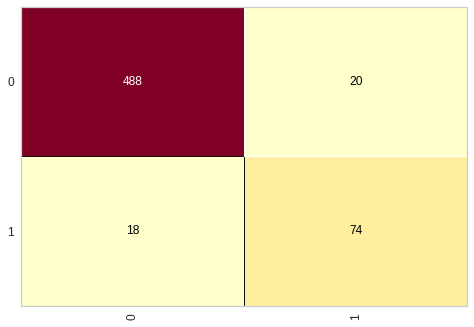

In [108]:
cf = ConfusionMatrix(SVM)
cf.fit(x_train,y_train)
cf.score(x_test,y_test)

In [123]:
print(classification_report(y_test,previsoesSVM))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       508
           1       0.79      0.80      0.80        92

    accuracy                           0.94       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.94      0.94      0.94       600



Portanto, o algoritmo *SVM* consegue prever 96% (recall) de todas as pessoas que pagam o empréstimo e desses 96%, 96% (precision) realmente pagam o empréstimo. Já para os que não pagam, o algoritmo consegue prever 80% dos casos e desses 80%, 79% realmente não pagam o empréstimo.

# Conclusão 

Concluí-se então que o algoritmo que melhor se adaptou aos dados com os parâmetros escolhidos pelo método do *GridSearch* foi o *RandomForest* com 98.8% de acurácia.